In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\santh\OneDrive\Desktop\Sooraj S Internship doc\sales_data_sample.csv",index_col=0)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 5327: invalid start byte

In [4]:
df=pd.read_csv(r"C:\Users\santh\OneDrive\Desktop\Sooraj S Internship doc\Sooraj S Internship doc\sales_data_sample.csv",index_col=0)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 5327: invalid start byte

In [5]:
df = pd.read_csv(r"C:\Users\santh\OneDrive\Desktop\Sooraj S Internship doc\Sooraj S Internship doc\sales_data_sample.csv", index_col=0, encoding='latin1')


In [6]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('DEAL SIZE',axis=1))

KeyError: "['DEAL SIZE'] not found in axis"

In [16]:
scaler.fit(df.drop('ORDERLINENUMBER',axis=1))


ValueError: could not convert string to float: '2/24/2003 0:00'

In [17]:
from sklearn.preprocessing import StandardScaler

# Step 1: Keep only numeric columns (auto removes strings, dates)
df_numeric = df.select_dtypes(include='number')

# Step 2: Fit the scaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)


In [18]:
df_scaled = pd.DataFrame(scaled, columns=df_numeric.columns)
print(df_scaled.head())

   QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES    QTR_ID  MONTH_ID  \
0        -0.522891   0.596978        -1.057059 -0.370825 -1.427039 -1.392909   
1        -0.112201  -0.114450        -0.347015 -0.427897 -0.596243 -0.572337   
2         0.606505   0.549384        -1.057059  0.179443  0.234553 -0.025289   
3         1.017195  -0.019759        -0.110334  0.104701  0.234553  0.248235   
4         1.427884   0.810158         1.783116  0.896740  1.065350  0.795284   

   YEAR_ID      MSRP  
0 -1.16517 -0.142246  
1 -1.16517 -0.142246  
2 -1.16517 -0.142246  
3 -1.16517 -0.142246  
4 -1.16517 -0.142246  


In [19]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['DAY'] = df['ORDERDATE'].dt.day
df = df.drop('ORDERDATE', axis=1)


In [20]:
df_numeric = df.select_dtypes(include='number')
scaled = scaler.fit_transform(df_numeric)


In [22]:

from sklearn.preprocessing import StandardScaler

# Convert ORDERDATE to datetime and extract features
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['DAY'] = df['ORDERDATE'].dt.day
df = df.drop('ORDERDATE', axis=1)

# Keep only numeric columns
df_numeric = df.select_dtypes(include='number')

# Scale
scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(scaled, columns=df_numeric.columns)

print(df_scaled.head())


KeyError: 'ORDERDATE'

KeyError: 'ORDERDATE'

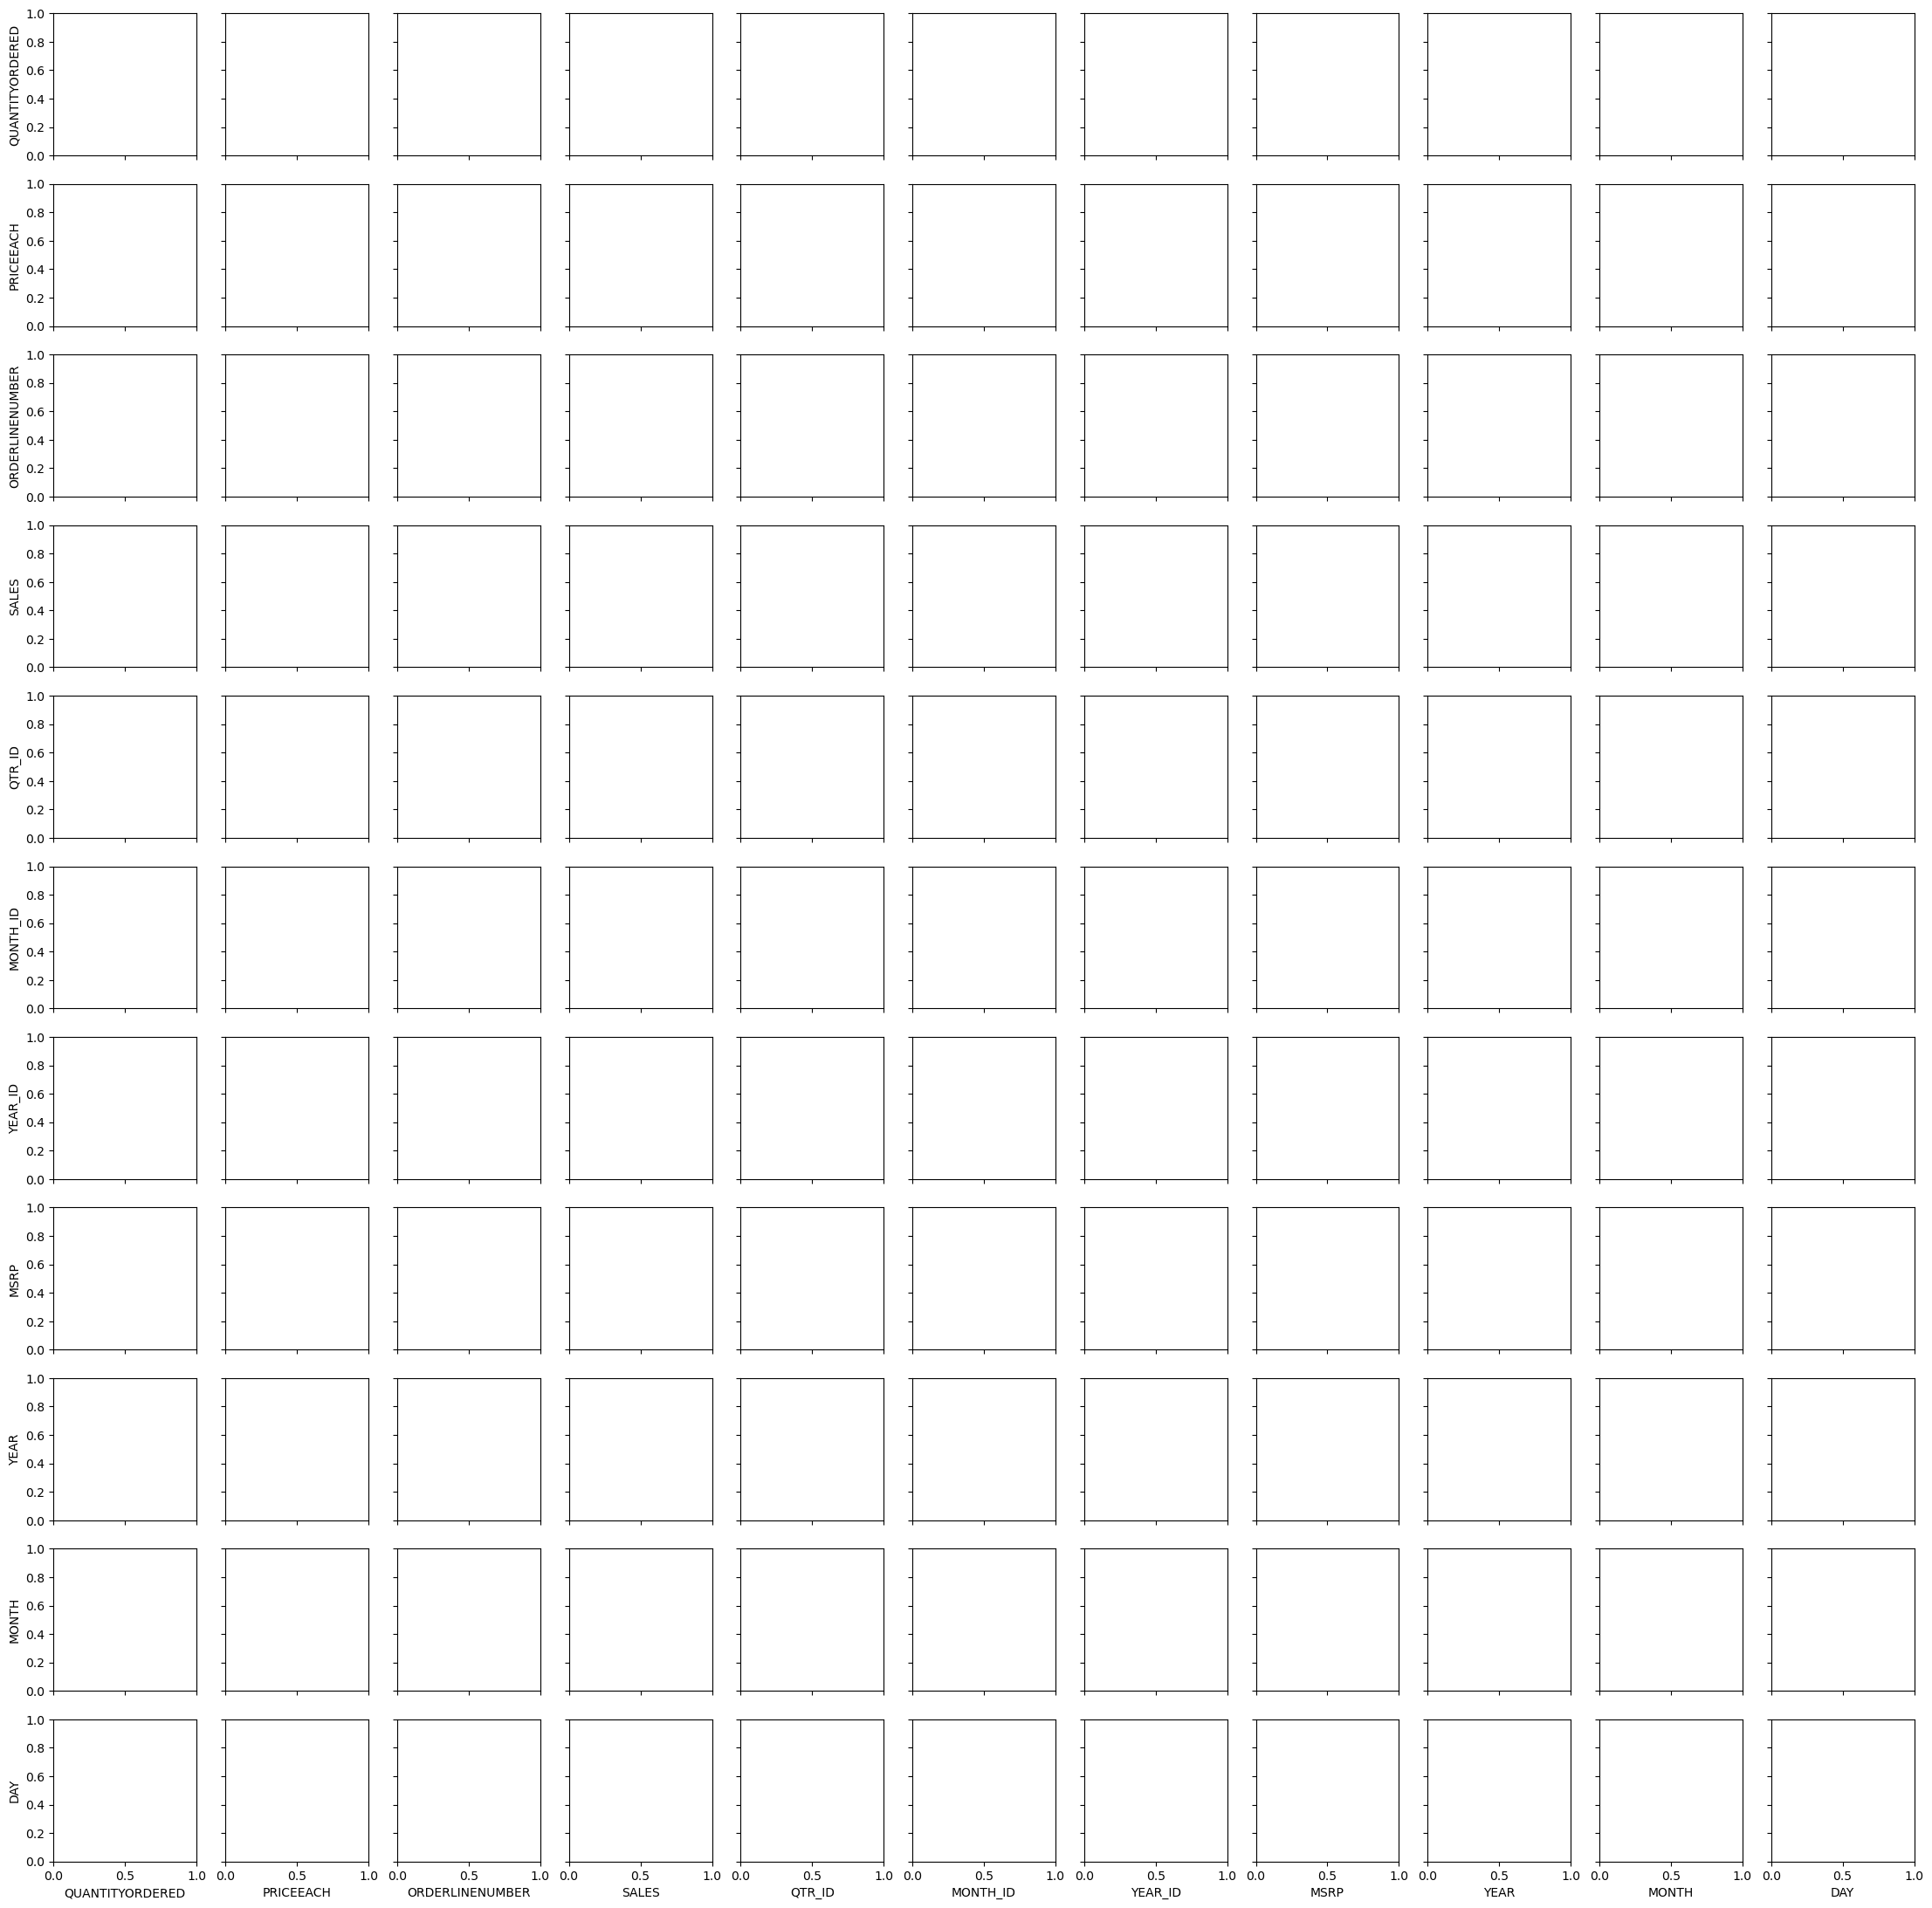

In [23]:
sns.pairplot(df,hue='ORDERDATE')

In [24]:
print(df.columns.tolist())


['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'YEAR', 'MONTH', 'DAY']


KeyError: 'ORDER DATE'

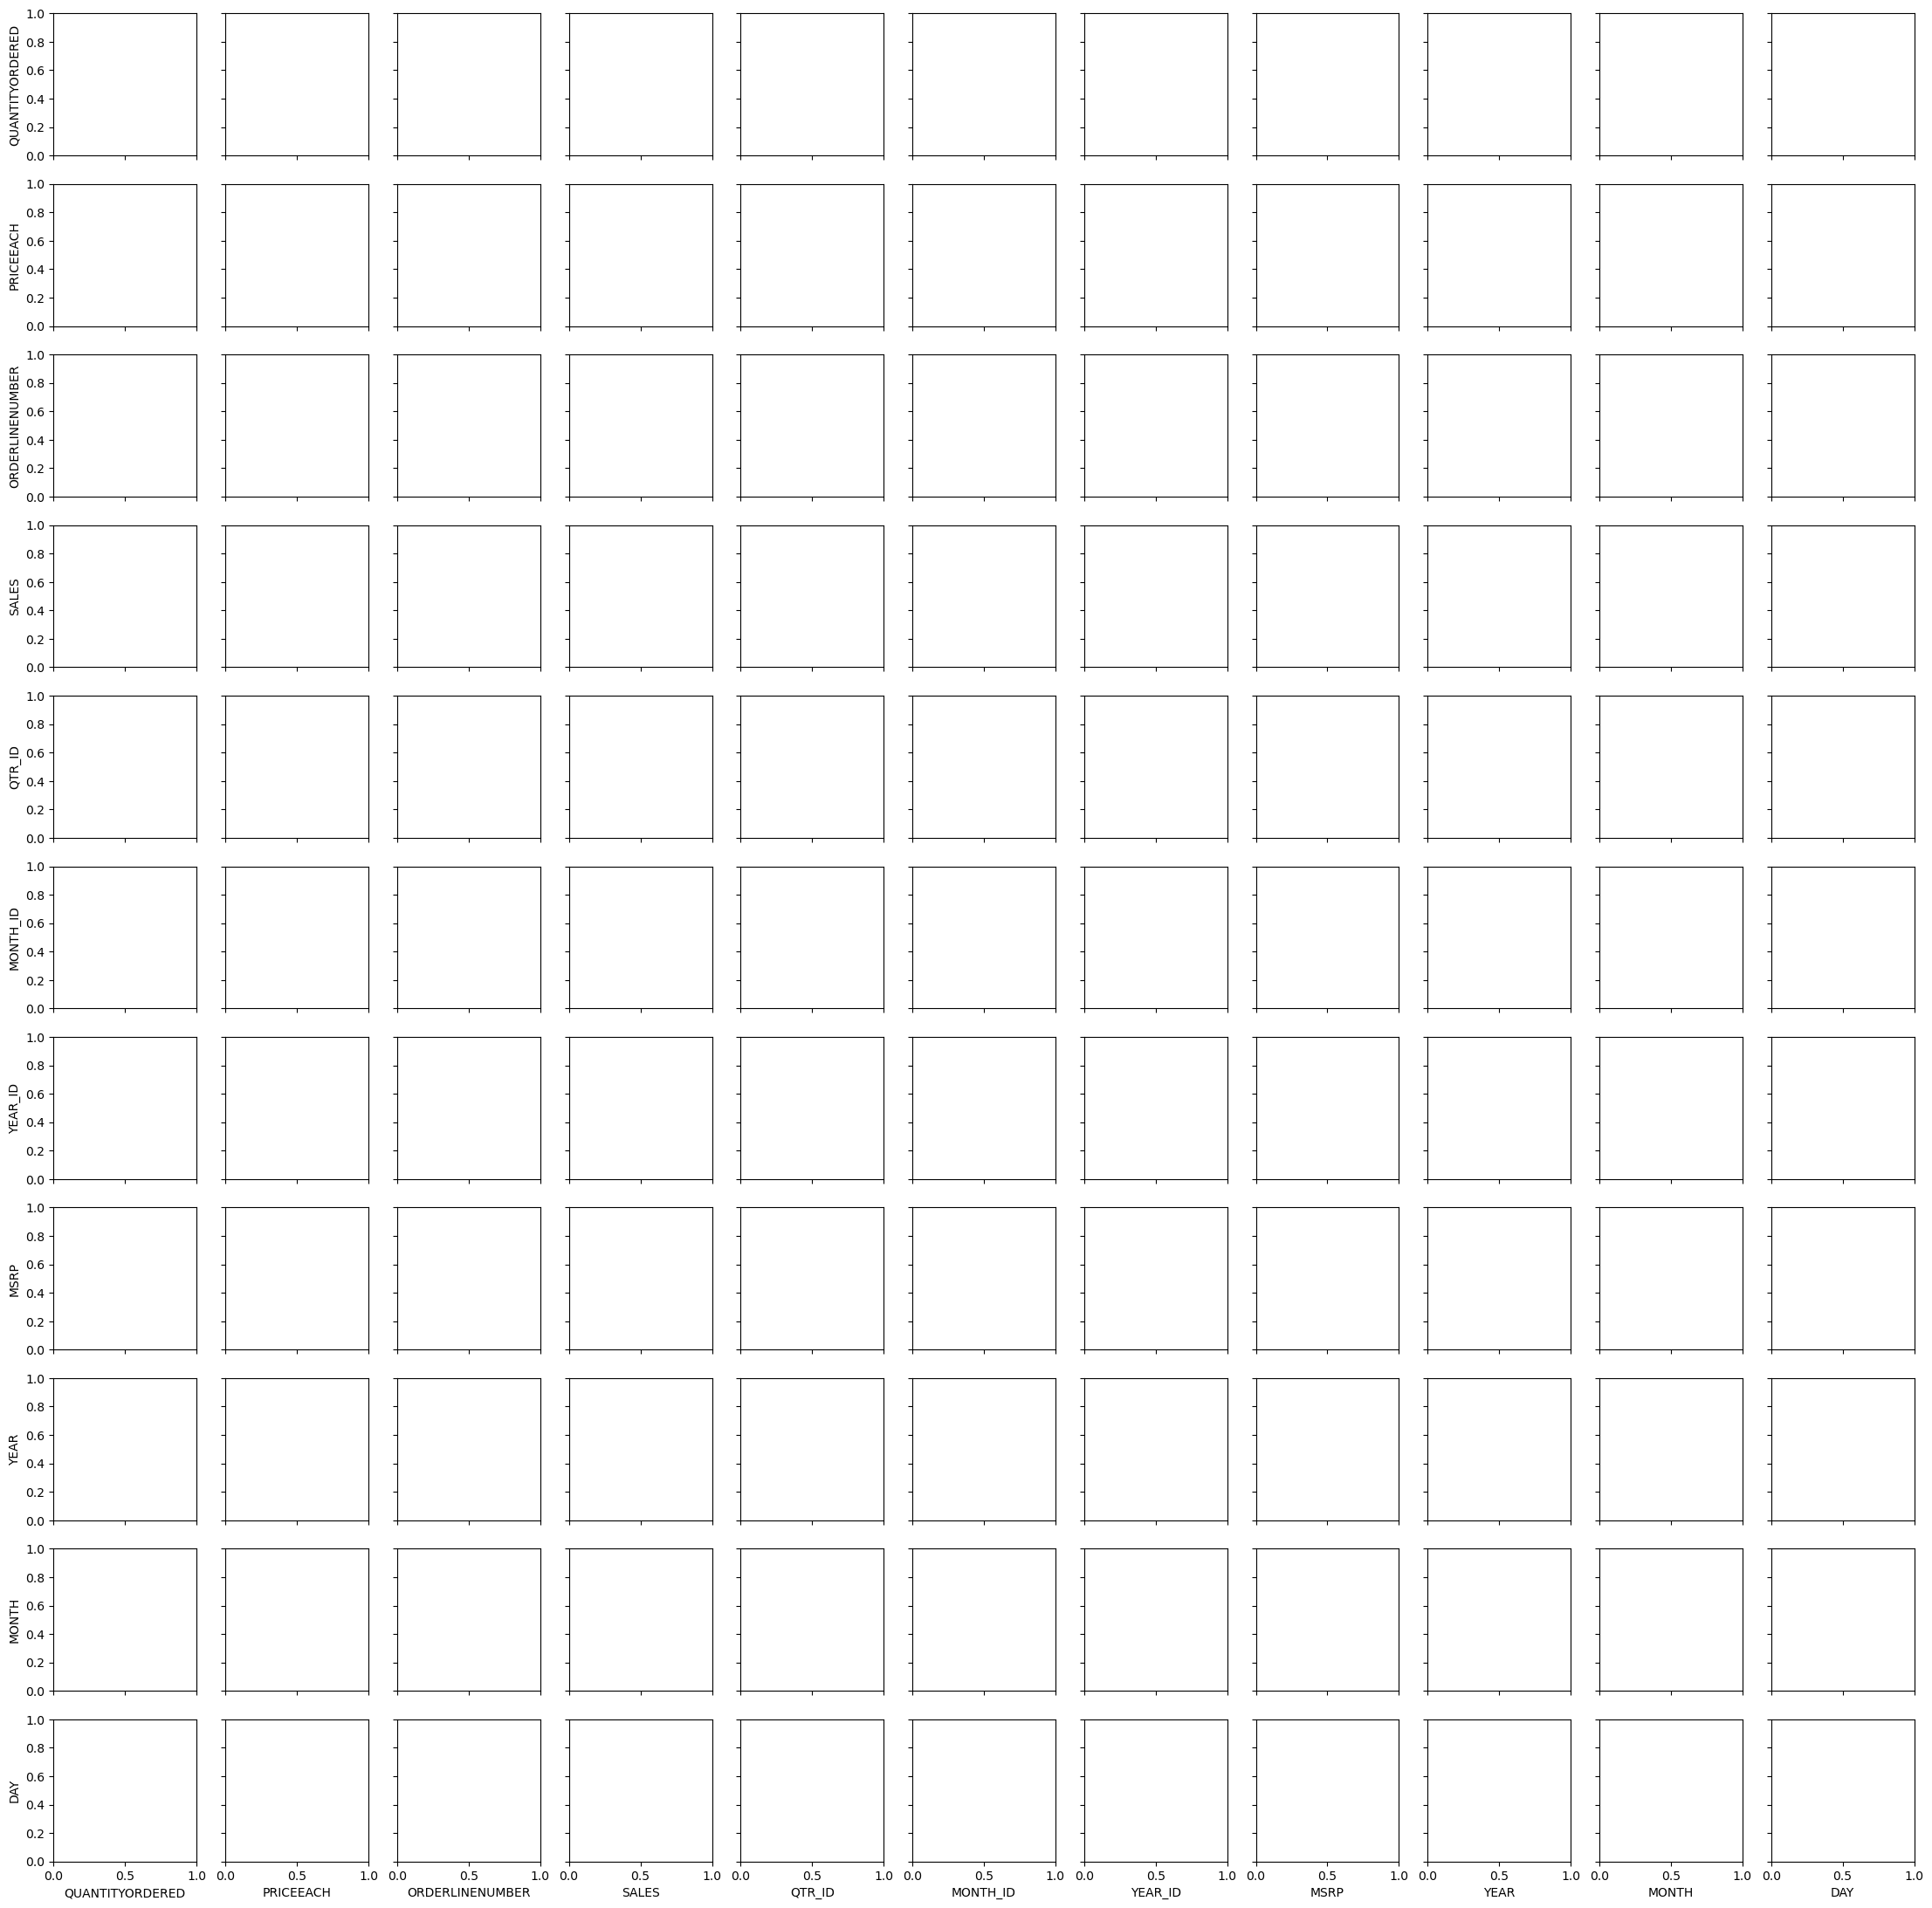

In [25]:
sns.pairplot(df, hue='ORDER DATE')


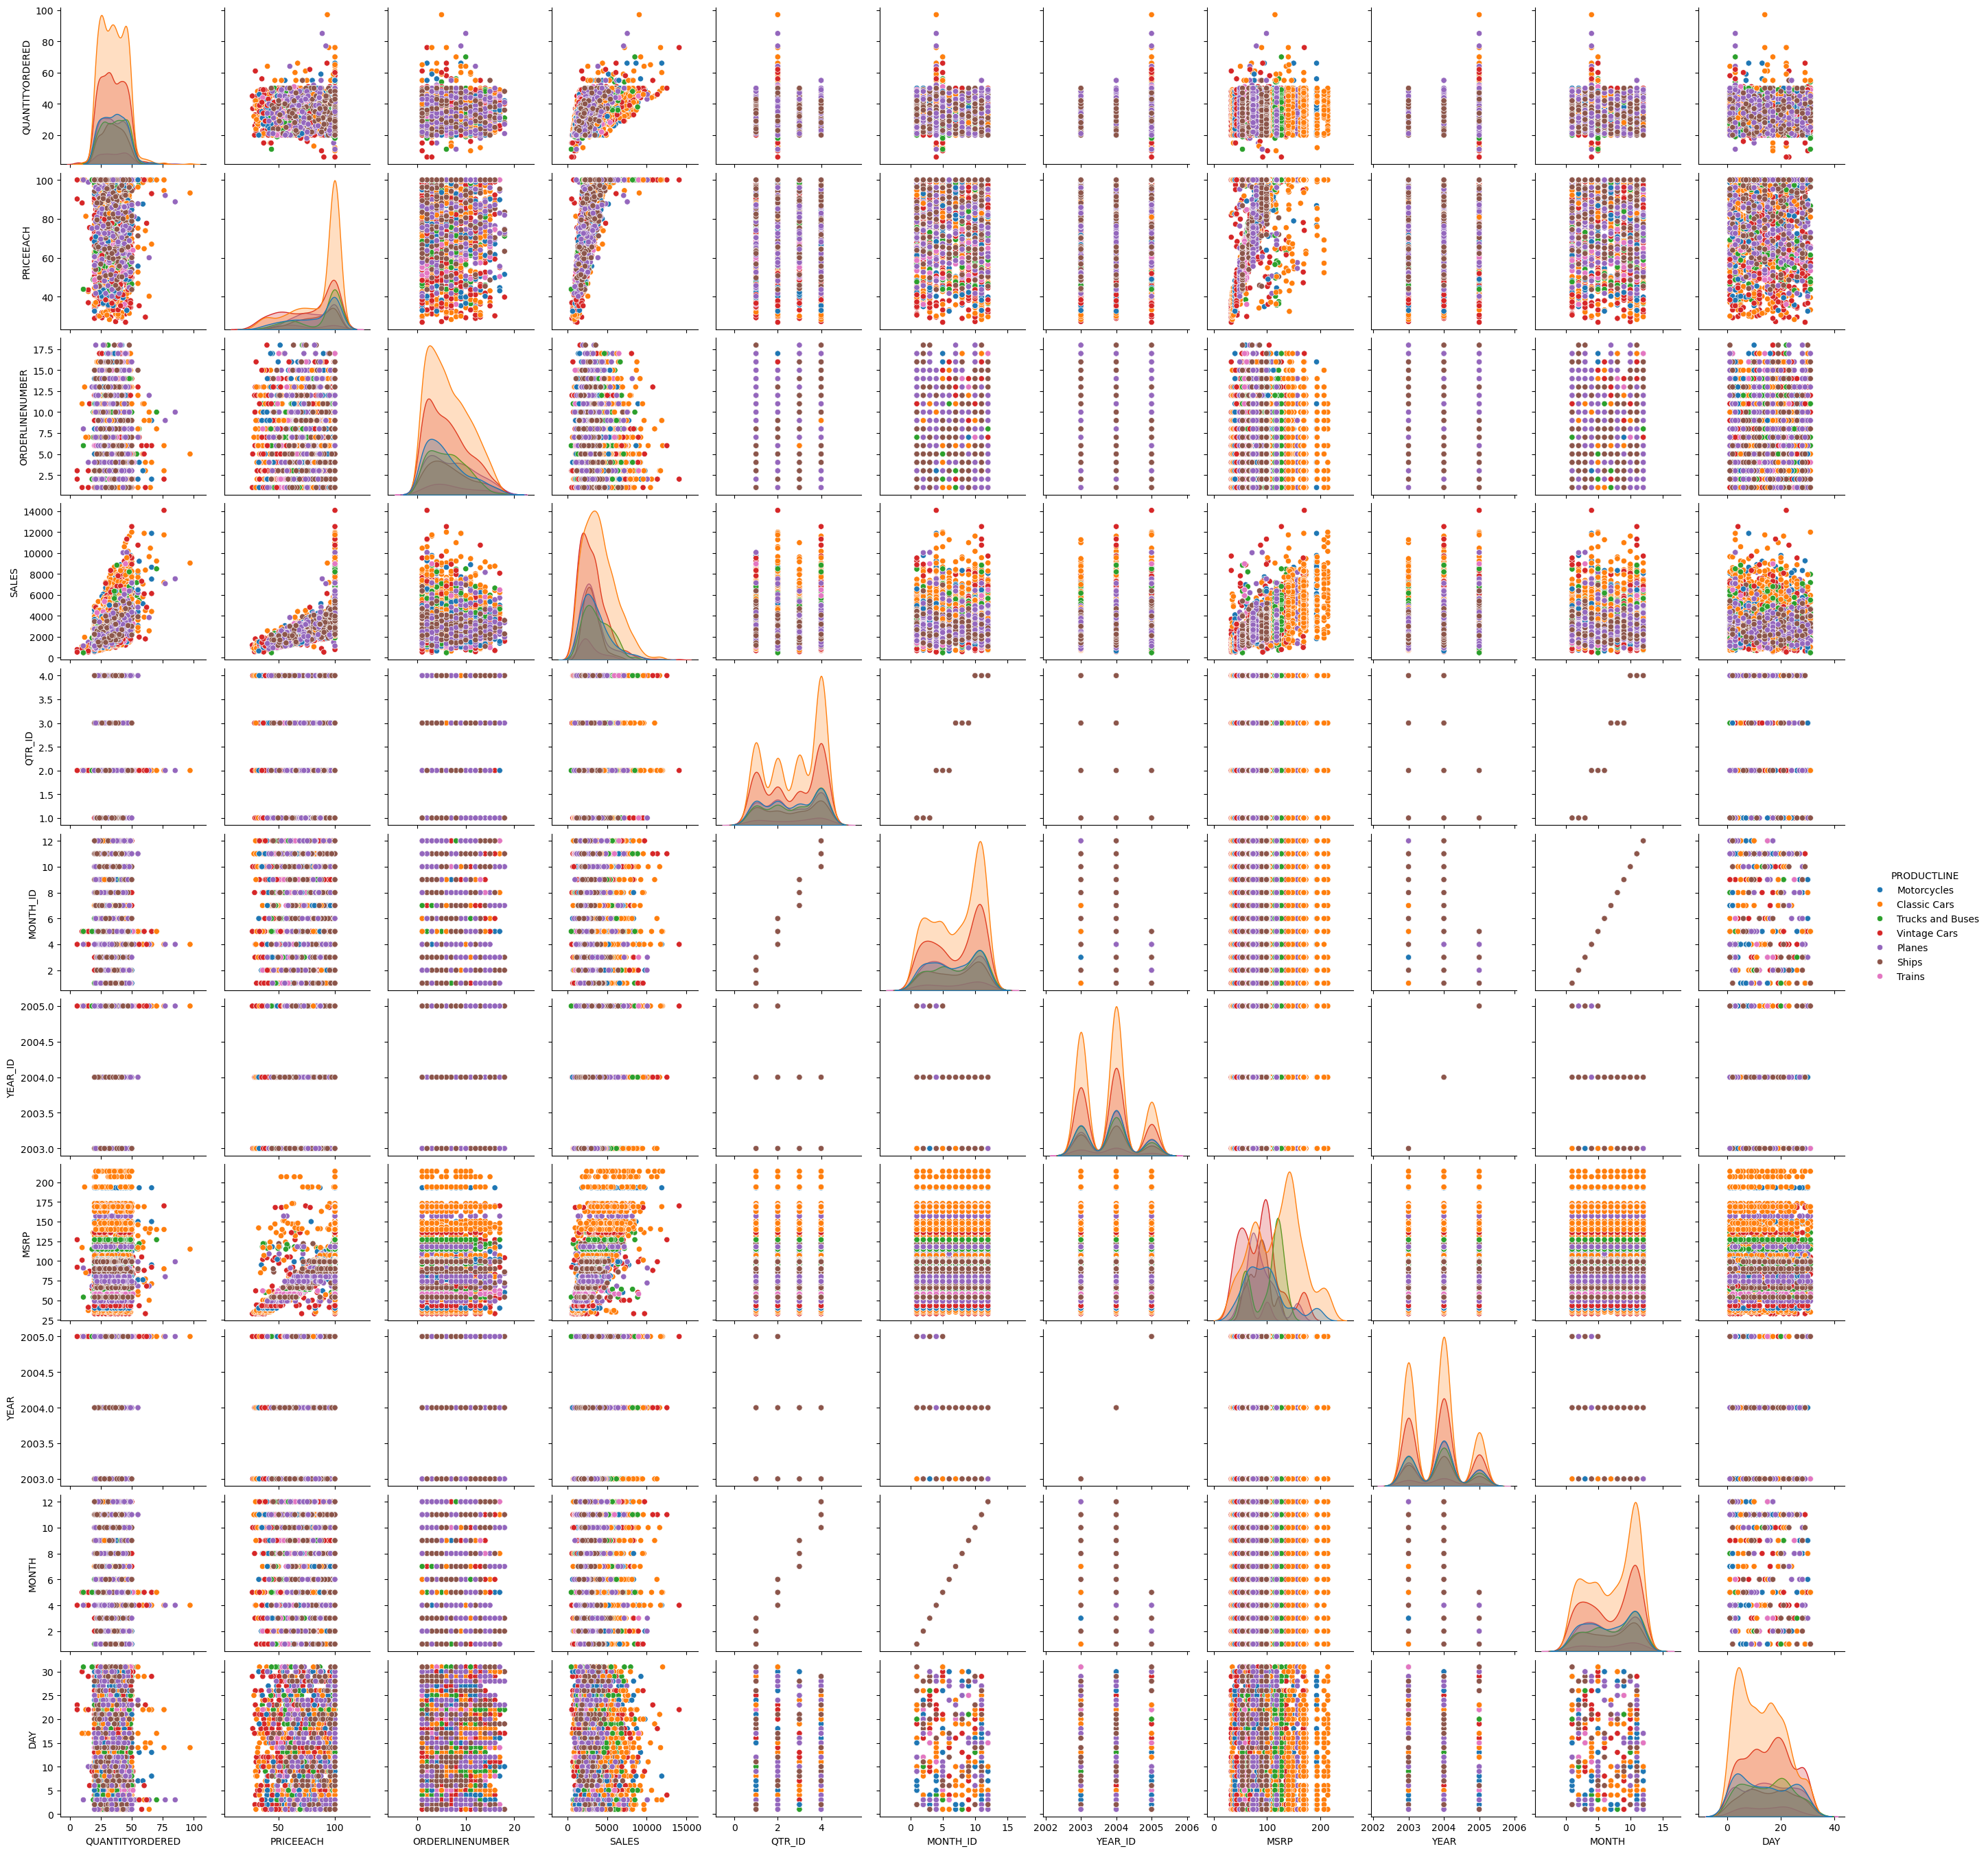

In [27]:
sns.pairplot(df, hue='PRODUCTLINE')
